In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#경로 설정 
import os
os.chdir('/content/drive/MyDrive/A2W/데이터')

# **geopandas 사용을 위한 함수 설치**

In [3]:
pip install pyproj

     |████████████████████████████████| 6.6MB 5.1MB/s 


In [4]:
pip install rtree

     |████████████████████████████████| 1.0MB 5.0MB/s 


In [5]:
pip install geopandas

     |████████████████████████████████| 1.0MB 5.1MB/s 
     |████████████████████████████████| 15.4MB 170kB/s 


In [6]:
# 필수 사용 라이브러리
import pandas as pd # 데이터 프레임화를 위한 라이브러리
import seaborn as sns # Heatmap 사용을 위한 라이브러리
import geopandas as gpd # GIS 데이터가 있는 데이터 사용을 위한 라이브러리
from shapely.geometry import Point, Polygon, LineString # 최대 면적으로 토양도를 매칭하기 위한 라이브러리

# **행정동 데이터**

In [7]:
# 행정동 경계 파일 읽기
hangjung_gubun = gpd.GeoDataFrame.from_file("umd.shp", encoding = 'utf-8')
# 산사태와 합치기 위한 새로운 변수 umd2(ssg+umd) 생성하기
hangjung_gubun_si = pd.read_csv('umd_si.csv', encoding='utf-8')
hangjung_gubun["sgg"] = hangjung_gubun_si
hangjung_gubun["umd2"] = hangjung_gubun["sgg"] + " " + hangjung_gubun["ADM_DR_NM"]
hangjung_gubun = hangjung_gubun.drop([ "BASE_DATE", "ADM_DR_CD"], axis= 1)
hangjung_gubun.rename(columns={'ADM_DR_NM':'umd'}, inplace=True)
hangjung_gubun

,umd,geometry,sgg,umd2
0,구룡포읍,"MULTIPOLYGON (((1184734.239 1774617.254, 11847...",포항시 남구,포항시 남구 구룡포읍
1,연일읍,"POLYGON ((1160923.832 1786524.018, 1160962.498...",포항시 남구,포항시 남구 연일읍
2,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383...",포항시 남구,포항시 남구 오천읍
3,대송면,"POLYGON ((1167538.928 1778439.770, 1167541.585...",포항시 남구,포항시 남구 대송면
4,동해면,"MULTIPOLYGON (((1181368.959 1784712.163, 11813...",포항시 남구,포항시 남구 동해면
...,...,...,...,...
632,쌍백면,"POLYGON ((1056287.745 1722189.578, 1056335.116...",합천군,합천군 쌍백면
633,삼가면,"POLYGON ((1052540.942 1719533.002, 1052573.371...",합천군,합천군 삼가면
634,가회면,"POLYGON ((1044199.527 1722837.244, 1044218.563...",합천군,합천군 가회면
635,대병면,"POLYGON ((1046756.129 1730112.827, 1046808.008...",합천군,합천군 대병면


# **산사태 데이터**

In [8]:
# 산사태 데이터 파일 읽기
landslide_CNT = pd.read_csv('Landslide_CNT.csv', encoding='utf-8')
landslide_CNT

,date,sd,sgg,umd,sum_cnt,sum_hpa
0,20110709,경상남도,밀양시,내일동,1,1.20
1,20110709,경상남도,밀양시,단장면,4,3.70
2,20110709,경상남도,밀양시,무안면,5,4.20
3,20110709,경상남도,밀양시,부북면,6,7.80
4,20110709,경상남도,밀양시,산외면,1,2.00
...,...,...,...,...,...,...
354,20191003,경상북도,포항시 북구,장량동,1,0.02
355,20191003,경상북도,포항시 북구,중앙동,1,0.40
356,20191003,경상북도,포항시 북구,청하면,4,0.93
357,20191003,경상북도,포항시 북구,환여동,1,0.10


# **데이터 합치기(산사태 + 행정동 경계)**

In [9]:
# 행정동 경계와 합치기 위한 새로운 변수 umd2(ssg+umd) 생성하기
landslide_CNT["umd2"] = landslide_CNT["sgg"] + " " + landslide_CNT["umd"]
landslide_CNT

,date,sd,sgg,umd,sum_cnt,sum_hpa,umd2
0,20110709,경상남도,밀양시,내일동,1,1.20,밀양시 내일동
1,20110709,경상남도,밀양시,단장면,4,3.70,밀양시 단장면
2,20110709,경상남도,밀양시,무안면,5,4.20,밀양시 무안면
3,20110709,경상남도,밀양시,부북면,6,7.80,밀양시 부북면
4,20110709,경상남도,밀양시,산외면,1,2.00,밀양시 산외면
...,...,...,...,...,...,...,...
354,20191003,경상북도,포항시 북구,장량동,1,0.02,포항시 북구 장량동
355,20191003,경상북도,포항시 북구,중앙동,1,0.40,포항시 북구 중앙동
356,20191003,경상북도,포항시 북구,청하면,4,0.93,포항시 북구 청하면
357,20191003,경상북도,포항시 북구,환여동,1,0.10,포항시 북구 환여동


In [10]:
# Space bar가 뒤에 포함된 남면, 묘산면, 수비면 Space bar 제거
landslide_CNT['umd2'] = landslide_CNT['umd2'].str.rstrip()

In [11]:
# 행정동 경계 데이터에 산사태 데이터 추가하기
hangjung_gubun["sum_cnt"] = 0
# 모든 산사태 데이터가 모두 적용 됬는지 확인하기
landslide_CNT["check"] = 0


for i in range (637):
  for j in range (359):
    if landslide_CNT["umd2"][j] == hangjung_gubun["umd2"][i]:
      hangjung_gubun["sum_cnt"][i] += landslide_CNT["sum_cnt"][j]
      landslide_CNT["check"][j] += 1

hangjung_gubun

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,umd,geometry,sgg,umd2,sum_cnt
0,구룡포읍,"MULTIPOLYGON (((1184734.239 1774617.254, 11847...",포항시 남구,포항시 남구 구룡포읍,0
1,연일읍,"POLYGON ((1160923.832 1786524.018, 1160962.498...",포항시 남구,포항시 남구 연일읍,2
2,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383...",포항시 남구,포항시 남구 오천읍,0
3,대송면,"POLYGON ((1167538.928 1778439.770, 1167541.585...",포항시 남구,포항시 남구 대송면,1
4,동해면,"MULTIPOLYGON (((1181368.959 1784712.163, 11813...",포항시 남구,포항시 남구 동해면,0
...,...,...,...,...,...
632,쌍백면,"POLYGON ((1056287.745 1722189.578, 1056335.116...",합천군,합천군 쌍백면,3
633,삼가면,"POLYGON ((1052540.942 1719533.002, 1052573.371...",합천군,합천군 삼가면,1
634,가회면,"POLYGON ((1044199.527 1722837.244, 1044218.563...",합천군,합천군 가회면,5
635,대병면,"POLYGON ((1046756.129 1730112.827, 1046808.008...",합천군,합천군 대병면,2


In [12]:
# 산사태 모든 데이터가 적용 됨을 확인
landslide_CNT[landslide_CNT["check"] == 0]

,date,sd,sgg,umd,sum_cnt,sum_hpa,umd2,check


In [13]:
# 행정동 경계에 산사태 발생 여부 열 생성
hangjung_gubun["landslide"] = 0

for i in range (637):
  if hangjung_gubun["sum_cnt"][i] > 0:
    hangjung_gubun["landslide"][i] = 1
hangjung_gubun

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,umd,geometry,sgg,umd2,sum_cnt,landslide
0,구룡포읍,"MULTIPOLYGON (((1184734.239 1774617.254, 11847...",포항시 남구,포항시 남구 구룡포읍,0,0
1,연일읍,"POLYGON ((1160923.832 1786524.018, 1160962.498...",포항시 남구,포항시 남구 연일읍,2,1
2,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383...",포항시 남구,포항시 남구 오천읍,0,0
3,대송면,"POLYGON ((1167538.928 1778439.770, 1167541.585...",포항시 남구,포항시 남구 대송면,1,1
4,동해면,"MULTIPOLYGON (((1181368.959 1784712.163, 11813...",포항시 남구,포항시 남구 동해면,0,0
...,...,...,...,...,...,...
632,쌍백면,"POLYGON ((1056287.745 1722189.578, 1056335.116...",합천군,합천군 쌍백면,3,1
633,삼가면,"POLYGON ((1052540.942 1719533.002, 1052573.371...",합천군,합천군 삼가면,1,1
634,가회면,"POLYGON ((1044199.527 1722837.244, 1044218.563...",합천군,합천군 가회면,5,1
635,대병면,"POLYGON ((1046756.129 1730112.827, 1046808.008...",합천군,합천군 대병면,2,1


In [14]:
# 산사태 발생한 행정동 개수 확인하기
hangjung_gubun['landslide'].value_counts()

0    396
1    241
Name: landslide, dtype: int64

# **토양도**

In [ ]:
# 경상북도 토양도1 파일 읽기
soil_gyeongbuk1 = gpd.GeoDataFrame.from_file("soil_gyeongbuk1.shp", encoding = 'utf-8')
soil_gyeongbuk1

,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,LDMARK_STN,MAP_LABEL,geometry
0,1,280272.57,266104.66,1,11,799.2,21.8,164.8,2,12,03,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1035111.750 1766151.771, 1035110.136..."
1,2,283750.14,265050.01,1,11,534.8,15.7,301.6,2,12,05,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1038301.281 1765131.640, 1038316.530..."
2,3,281027,265427,1,11,663.0,21.7,156.6,2,12,05,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1035935.188 1765721.998, 1035935.784..."
3,4,279833.45,267538.73,1,11,850.3,9.8,129.4,2,12,03,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1034633.940 1767271.065, 1034623.644..."
4,5,280102.57,266674.66,1,11,832.9,18.9,55.8,2,12,03,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1034709.542 1766460.149, 1034712.390..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221279,221280,346202.03125,396564.9375,3,31,597.0,35.6,288.8,1,3,2,2,2,2,02,L102,b'B\xa9\xfc',"POLYGON ((1101889.274 1896175.221, 1101892.028..."
221280,221281,349057.71875,396495.78125,3,31,905.9,33.1,312.2,1,3,2,2,2,2,02,L102,b'B\xa9\xfc',"POLYGON ((1104811.798 1895928.004, 1104814.922..."
221281,221282,346512.03125,396794.9375,3,31,728.3,29.4,303.0,1,3,2,2,2,2,02,L102,b'B\xa9\xfc',"POLYGON ((1102175.089 1896287.757, 1102178.071..."
221282,221283,346507.03125,397274.9375,3,31,768.2,33.7,287.9,1,3,2,3,2,2,02,L102,b'B\xa9\xfc',"MULTIPOLYGON (((1102311.492 1896747.225, 11023..."


In [ ]:
# 경상북도 토양도2 파일 읽기
soil_gyeongbuk2 = gpd.GeoDataFrame.from_file("soil_gyeongbuk2.shp", encoding = 'utf-8')
soil_gyeongbuk2

,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,LDMARK_STN,MAP_LABEL,geometry
0,221285,321827.61,248439.61,2,22,240.0,0.0,-1.0,3,12,01,1,10,03,13,L313,b'DRb\xa9\xfb',"POLYGON ((1077024.102 1747919.176, 1077029.655..."
1,221286,322381.95,248422.71,2,22,91.2,16.9,67.4,3,12,05,2,20,03,14,L314,b'DRb\xa9\xfc',"POLYGON ((1077249.239 1747943.453, 1077249.218..."
2,221287,323040,248901,2,24,274.6,10.8,96.5,3,12,01,1,20,02,01,L101,b'B\xa9\xfb',"POLYGON ((1077576.669 1747955.809, 1077573.392..."
3,221288,323178.49,248552.08,2,24,149.0,27.3,300.1,3,12,05,3,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1077728.510 1747969.313, 1077724.133..."
4,221289,323231.7,248407.78,2,24,174.3,32.3,229.1,3,12,05,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1078028.473 1747943.514, 1078032.681..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128088,349373,414894.09,392483.24,3,31,55.6,7.0,188.3,4,07,05,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1170307.915 1891782.550, 1170310.789..."
128089,349374,414919.89,392903.28,3,31,48.3,25.3,359.7,4,07,05,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1170256.727 1892170.624, 1170261.351..."
128090,349375,414933.61,392778.4,3,31,72.4,19.1,96.3,4,07,01,1,10,02,01,L101,b'B\xa9\xfb',"POLYGON ((1170277.283 1891920.324, 1170283.163..."
128091,349376,414977.64,391941.33,3,31,42.2,13.4,192.8,4,07,05,1,10,02,27,L727,Im,"POLYGON ((1170514.324 1891491.392, 1170519.793..."


In [ ]:
# 경남 토양도 파일 읽기
soil_gyeongnam = gpd.GeoDataFrame.from_file("soil_gyeongnam.shp", encoding = 'utf-8')
soil_gyeongnam

,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,LDMARK_STN,MAP_LABEL,geometry
0,1,272532.09,224400.12,3,31,138.8,27.1,26.6,2,12,05,2,20,01,02,L102,b'B\xa9\xfc',"POLYGON ((1027205.103 1724255.439, 1027214.829..."
1,2,272345.16,224387.78,3,31,159.2,33.2,357.8,2,12,05,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1026978.790 1724211.973, 1026976.591..."
2,3,272250.76,224336.55,3,31,173.0,18.0,345.6,2,12,05,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1026887.967 1724103.048, 1026886.119..."
3,4,271989.83,224347.75,3,31,143.3,42.8,313.4,2,12,05,2,20,01,02,L102,b'B\xa9\xfc',"POLYGON ((1026620.495 1724179.025, 1026613.575..."
4,5,272573.94,224291.26,3,31,150.2,22.7,4.2,2,12,05,2,20,01,02,L102,b'B\xa9\xfc',"POLYGON ((1027261.058 1724181.369, 1027270.027..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224753,224754,337166.92,237231.29,1,14,112.4,32.8,152.7,3,12,05,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1091953.499 1737047.823, 1091958.656..."
224754,224755,337632.81,236892.69,2,25,277.9,25.4,209.0,3,12,01,1,10,02,01,L101,b'B\xa9\xfb',"POLYGON ((1092290.081 1737061.135, 1092293.391..."
224755,224756,337931.09,237395.44,2,25,147.3,24.3,89.2,3,12,05,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1092589.569 1737023.026, 1092557.644..."
224756,224757,337963.99,237046.15,2,25,263.3,30.6,23.5,3,12,03,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1092258.418 1737153.111, 1092260.266..."


# **데이터 합치기(토양도 + 행정동 + 산사태)**

In [ ]:
# Geopandas의 sjoin을 이용하여 토양도(경북1) 데이터와 행정동 데이터 합치기
result_h_s = gpd.sjoin(hangjung_gubun, soil_gyeongbuk1, how='right', op='intersects')
result_h_s

,index_left,BASE_DATE,ADM_DR_CD,ADM_DR_NM,시,umd2,sum_cnt,landslide,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,LDMARK_STN,MAP_LABEL,geometry
0,611.0,20200630,3839033,고제면,거창군,거창군 고제면,3.0,1.0,1,280272.57,266104.66,1,11,799.2,21.8,164.8,2,12,03,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1035111.750 1766151.771, 1035110.136..."
1,610.0,20200630,3839032,웅양면,거창군,거창군 웅양면,4.0,1.0,2,283750.14,265050.01,1,11,534.8,15.7,301.6,2,12,05,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1038301.281 1765131.640, 1038316.530..."
2,610.0,20200630,3839032,웅양면,거창군,거창군 웅양면,4.0,1.0,3,281027,265427,1,11,663.0,21.7,156.6,2,12,05,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1035935.188 1765721.998, 1035935.784..."
3,611.0,20200630,3839033,고제면,거창군,거창군 고제면,3.0,1.0,4,279833.45,267538.73,1,11,850.3,9.8,129.4,2,12,03,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1034633.940 1767271.065, 1034623.644..."
4,611.0,20200630,3839033,고제면,거창군,거창군 고제면,3.0,1.0,5,280102.57,266674.66,1,11,832.9,18.9,55.8,2,12,03,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1034709.542 1766460.149, 1034712.390..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221279,134.0,20200630,3706039,부석면,영주시,영주시 부석면,0.0,0.0,221280,346202.03125,396564.9375,3,31,597.0,35.6,288.8,1,3,2,2,2,2,02,L102,b'B\xa9\xfc',"POLYGON ((1101889.274 1896175.221, 1101892.028..."
221280,134.0,20200630,3706039,부석면,영주시,영주시 부석면,0.0,0.0,221281,349057.71875,396495.78125,3,31,905.9,33.1,312.2,1,3,2,2,2,2,02,L102,b'B\xa9\xfc',"POLYGON ((1104811.798 1895928.004, 1104814.922..."
221281,134.0,20200630,3706039,부석면,영주시,영주시 부석면,0.0,0.0,221282,346512.03125,396794.9375,3,31,728.3,29.4,303.0,1,3,2,2,2,2,02,L102,b'B\xa9\xfc',"POLYGON ((1102175.089 1896287.757, 1102178.071..."
221282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221283,346507.03125,397274.9375,3,31,768.2,33.7,287.9,1,3,2,3,2,2,02,L102,b'B\xa9\xfc',"MULTIPOLYGON (((1102311.492 1896747.225, 11023..."


In [ ]:
# 토양도의 polgon 데이터의 면적을 구하여 최대 면적을 행정동에 매칭
result_h_s["area"] = result_h_s.geometry.area
rmp = result_h_s.groupby('umd2')['area'].agg(**{'area':'max'}).reset_index()
rmp

,umd2,area
0,거창군 가북면,228757.508461
1,거창군 고제면,122319.508967
2,거창군 웅양면,230602.186877
3,경산시 남산면,275644.645891
4,경산시 남천면,398962.553273
...,...,...
233,합천군 묘산면,148348.092252
234,합천군 쌍책면,188258.085000
235,합천군 야로면,262206.940968
236,합천군 율곡면,279496.875209


In [ ]:
# 면적 데이터와 umd2 기준으로 행정동에 토양도 데이터 매칭
merge_outer = pd.merge(result_h_s,rmp,on=['umd2','area'])
merge_outer

,index_left,BASE_DATE,ADM_DR_CD,ADM_DR_NM,시,umd2,sum_cnt,landslide,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,LDMARK_STN,MAP_LABEL,geometry,area
0,611.0,20200630,3839033,고제면,거창군,거창군 고제면,3.0,1.0,1475,280422.57,266559.66,1,11,805.5,27.1,80.5,2,12,01,1,10,01,01,L101,b'B\xa9\xfb',"POLYGON ((1035605.444 1766781.209, 1035607.554...",122319.508967
1,413.0,20200630,3808032,상동면,밀양시,밀양시 상동면,6.0,1.0,2736,356053.04,233011.13,2,25,424.3,32.5,333.4,3,12,06,3,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1110902.049 1732974.733, 1110903.139...",154080.022974
2,262.0,20200630,3736011,화양읍,청도군,청도군 화양읍,1.0,1.0,2755,355418.97,239129.51,2,25,356.3,24.5,319.6,3,12,01,1,10,02,01,L101,b'B\xa9\xfb',"POLYGON ((1110309.733 1739094.285, 1110308.129...",282330.002019
3,412.0,20200630,3808031,부북면,밀양시,밀양시 부북면,6.0,1.0,2911,354148.04,233036.13,1,11,698.6,34.1,28.2,3,12,01,1,10,02,01,L101,b'B\xa9\xfb',"POLYGON ((1109162.876 1732712.969, 1109142.005...",80113.793154
4,420.0,20200630,3808039,청도면,밀양시,밀양시 청도면,2.0,1.0,2919,350284.27,234934.39,2,25,373.4,20.9,19.9,3,12,01,1,10,02,15,L415,b'GrB\xa9\xfb',"MULTIPOLYGON (((1104564.956 1734034.339, 11045...",217415.717084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,223.0,20200630,3732032,점곡면,의성군,의성군 점곡면,0.0,0.0,216742,361908.98,329546.55,2,24,260.0,0.0,-1.0,2,12,05,2,20,03,16,L416,b'GrB\xa9\xfc',"POLYGON ((1117474.527 1829312.018, 1117473.679...",286790.297578
234,224.0,20200630,3732033,옥산면,의성군,의성군 옥산면,0.0,0.0,217270,359888.66,318012.46,2,22,312.1,14.2,328.9,2,12,05,2,20,03,16,L416,b'GrB\xa9\xfc',"POLYGON ((1114770.108 1817930.660, 1114771.913...",249955.239592
235,81.0,20200630,3704037,남선면,안동시,안동시 남선면,0.0,0.0,219423,359426.98,332336.19,2,24,294.1,38.7,90.3,2,12,06,3,20,03,16,L416,b'GrB\xa9\xfc',"POLYGON ((1114743.813 1832235.006, 1114743.906...",295267.348332
236,82.0,20200630,3704038,임하면,안동시,안동시 임하면,0.0,0.0,219958,361076.36,332385.42,2,24,313.7,31.7,2.5,2,12,05,2,20,03,16,L416,b'GrB\xa9\xfc',"POLYGON ((1116667.124 1832158.137, 1116663.913...",288196.490313


In [ ]:
# Geopandas의 sjoin을 이용하여 토양도(경북2) 데이터와 행정동 데이터 합치기
result_h_s1 = gpd.sjoin(hangjung_gubun, soil_gyeongbuk2, how='right', op='intersects')
result_h_s1

,index_left,BASE_DATE,ADM_DR_CD,ADM_DR_NM,시,umd2,sum_cnt,landslide,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,LDMARK_STN,MAP_LABEL,geometry
0,276.0,20200630,3737035,개진면,고령군,고령군 개진면,0.0,0.0,221285,321827.61,248439.61,2,22,240.0,0.0,-1.0,3,12,01,1,10,03,13,L313,b'DRb\xa9\xfb',"POLYGON ((1077024.102 1747919.176, 1077029.655..."
1,276.0,20200630,3737035,개진면,고령군,고령군 개진면,0.0,0.0,221286,322381.95,248422.71,2,22,91.2,16.9,67.4,3,12,05,2,20,03,14,L314,b'DRb\xa9\xfc',"POLYGON ((1077249.239 1747943.453, 1077249.218..."
2,276.0,20200630,3737035,개진면,고령군,고령군 개진면,0.0,0.0,221287,323040,248901,2,24,274.6,10.8,96.5,3,12,01,1,20,02,01,L101,b'B\xa9\xfb',"POLYGON ((1077576.669 1747955.809, 1077573.392..."
3,276.0,20200630,3737035,개진면,고령군,고령군 개진면,0.0,0.0,221288,323178.49,248552.08,2,24,149.0,27.3,300.1,3,12,05,3,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1077728.510 1747969.313, 1077724.133..."
4,276.0,20200630,3737035,개진면,고령군,고령군 개진면,0.0,0.0,221289,323231.7,248407.78,2,24,174.3,32.3,229.1,3,12,05,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1078028.473 1747943.514, 1078032.681..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128088,319.0,20200630,3742011,울진읍,울진군,울진군 울진읍,36.0,1.0,349373,414894.09,392483.24,3,31,55.6,7.0,188.3,4,07,05,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1170307.915 1891782.550, 1170310.789..."
128089,319.0,20200630,3742011,울진읍,울진군,울진군 울진읍,36.0,1.0,349374,414919.89,392903.28,3,31,48.3,25.3,359.7,4,07,05,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1170256.727 1892170.624, 1170261.351..."
128090,319.0,20200630,3742011,울진읍,울진군,울진군 울진읍,36.0,1.0,349375,414933.61,392778.4,3,31,72.4,19.1,96.3,4,07,01,1,10,02,01,L101,b'B\xa9\xfb',"POLYGON ((1170277.283 1891920.324, 1170283.163..."
128091,319.0,20200630,3742011,울진읍,울진군,울진군 울진읍,36.0,1.0,349376,414977.64,391941.33,3,31,42.2,13.4,192.8,4,07,05,1,10,02,27,L727,Im,"POLYGON ((1170514.324 1891491.392, 1170519.793..."


In [ ]:
# 토양도의 polgon 데이터의 면적을 구하여 최대 면적의 토양도 데이터를 행정동에 매칭
result_h_s1["area"] = result_h_s1.geometry.area
rmp1 = result_h_s1.groupby('umd2')['area'].agg(**{'area':'max'}).reset_index()
merge_outer1 = pd.merge(result_h_s1,rmp1,on=['umd2','area'])
merge_outer1

,index_left,BASE_DATE,ADM_DR_CD,ADM_DR_NM,시,umd2,sum_cnt,landslide,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,LDMARK_STN,MAP_LABEL,geometry,area
0,276.0,20200630,3737035,개진면,고령군,고령군 개진면,0.0,0.0,221291,323585.15,248457.02,2,24,306.1,18.7,158.6,3,12,01,1,20,02,01,L101,b'B\xa9\xfb',"MULTIPOLYGON (((1077730.615 1747915.354, 10777...",573125.914456
1,274.0,20200630,3737033,성산면,고령군,고령군 성산면,0.0,0.0,221315,324735.94,248511.41,2,26,103.2,13.4,244.5,3,12,01,1,10,02,01,L101,b'B\xa9\xfb',"POLYGON ((1079941.761 1748929.311, 1079941.734...",499155.259968
2,277.0,20200630,3737036,우곡면,고령군,고령군 우곡면,1.0,1.0,221860,322059.85,240132,2,24,64.1,17.7,285.2,3,07,01,1,10,03,13,L313,b'DRb\xa9\xfb',"MULTIPOLYGON (((1077071.844 1739931.107, 10770...",477120.157525
3,266.0,20200630,3736033,각북면,청도군,청도군 각북면,0.0,0.0,222469,341324,246272,1,12,573.4,22.5,15.5,3,12,01,1,10,02,01,L101,b'B\xa9\xfb',"POLYGON ((1096076.711 1746735.789, 1096082.000...",434384.134642
4,267.0,20200630,3736034,이서면,청도군,청도군 이서면,0.0,0.0,222863,353153,248292,2,26,249.5,15.1,86.6,3,12,01,1,10,02,01,L101,b'B\xa9\xfb',"POLYGON ((1108027.010 1747855.448, 1108032.166...",498817.582789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,328.0,20200630,3742040,매화면,울진군,울진군 매화면,45.0,1.0,336123,407606.07,379224.41,3,31,515.8,38.7,104.6,2,12,01,1,10,01,01,L101,b'B\xa9\xfb',"POLYGON ((1163083.338 1879561.409, 1163088.543...",495126.957389
121,323.0,20200630,3742035,기성면,울진군,울진군 기성면,34.0,1.0,338184,412438.6,373049.99,3,31,303.7,11.8,268.9,4,12,01,1,10,01,01,L101,b'B\xa9\xfb',"POLYGON ((1167772.423 1873435.202, 1167775.187...",475475.958312
122,315.0,20200630,3741036,석포면,봉화군,봉화군 석포면,0.0,0.0,342905,388223.38,400388.17,1,11,863.1,31.2,162.6,1,12,01,1,20,02,01,L101,b'B\xa9\xfb',"POLYGON ((1143637.371 1900129.876, 1143642.495...",491674.967410
123,321.0,20200630,3742031,북면,울진군,울진군 북면,25.0,1.0,346254,408565.71,403281.54,3,31,99.9,32.7,37.5,4,07,01,1,10,01,01,L101,b'B\xa9\xfb',"POLYGON ((1163948.347 1903138.340, 1163949.590...",495529.896001


In [ ]:
# Geopandas의 sjoin을 이용하여 토양도(경남) 데이터와 행정동 데이터 합치기(1:1)
result_h_s2 = gpd.sjoin(hangjung_gubun, soil_gyeongnam, how='right', op='intersects')
result_h_s2["area"] = result_h_s2.geometry.area
rmp2 = result_h_s2.groupby('umd2')['area'].agg(**{'area':'max'}).reset_index()
merge_outer2 = pd.merge(result_h_s2,rmp2,on=['umd2','area'])
merge_outer2

,index_left,BASE_DATE,ADM_DR_CD,ADM_DR_NM,시,umd2,sum_cnt,landslide,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,LDMARK_STN,MAP_LABEL,geometry,area
0,597.0,20200630,3838011,함양읍,함양군,함양군 함양읍,10.0,1.0,2080,259333.16,223309.12,1,11,559.2,29.7,314.0,2,12,06,3,20,01,02,L102,b'B\xa9\xfc',"POLYGON ((1014379.838 1724055.892, 1014375.868...",8.744564e+05
1,598.0,20200630,3838031,마천면,함양군,함양군 마천면,7.0,1.0,4224,264881.81,215697.5,3,31,675.0,32.8,175.9,2,12,06,2,30,01,02,L102,b'B\xa9\xfc',"POLYGON ((1019094.132 1716270.548, 1019092.784...",1.133174e+06
2,599.0,20200630,3838032,휴천면,함양군,함양군 휴천면,8.0,1.0,4224,264881.81,215697.5,3,31,675.0,32.8,175.9,2,12,06,2,30,01,02,L102,b'B\xa9\xfc',"POLYGON ((1019094.132 1716270.548, 1019092.784...",1.133174e+06
3,600.0,20200630,3838033,유림면,함양군,함양군 유림면,3.0,1.0,5341,268856.83,216966.29,3,31,416.0,38.7,60.3,2,12,05,2,20,01,02,L102,b'B\xa9\xfc',"POLYGON ((1023607.356 1718052.291, 1023605.975...",4.401487e+05
4,590.0,20200630,3837034,금서면,산청군,산청군 금서면,4.0,1.0,8005,274115.12,210073.59,3,31,454.4,32.7,356.8,2,12,06,3,30,02,03,L103,b'B\xa9\xfd',"POLYGON ((1028195.484 1709476.544, 1028198.874...",9.694396e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,423.0,20200630,3808053,교동,밀양시,밀양시 교동,0.0,0.0,222921,359441,226042,2,25,222.6,16.8,101.5,3,12,01,1,10,02,13,L313,b'DRb\xa9\xfb',"POLYGON ((1114510.505 1726069.735, 1114503.822...",2.860836e+05
309,264.0,20200630,3736031,각남면,청도군,청도군 각남면,0.0,0.0,223505,346315,232252,1,14,270.4,39.5,64.8,3,12,06,3,30,02,02,L102,b'B\xa9\xfc',"POLYGON ((1100939.616 1732296.031, 1100938.157...",2.750766e+05
310,269.0,20200630,3736036,금천면,청도군,청도군 금천면,0.0,0.0,223627,373853.14,239941.34,2,25,656.2,37.0,66.3,3,12,01,1,10,02,01,L101,b'B\xa9\xfb',"POLYGON ((1128664.683 1739640.320, 1128654.444...",1.300992e+05
311,538.0,20200630,3833032,성산면,창녕군,창녕군 성산면,1.0,1.0,224110,335594,238505,1,14,253.9,9.9,257.0,3,07,01,1,10,03,01,L101,b'B\xa9\xfb',"POLYGON ((1090512.626 1738320.996, 1090516.656...",3.898698e+05


In [ ]:
# 경북과 경남의 데이터 합치기
sum_hgb = pd.concat([merge_outer1, merge_outer])
sum_hg = pd.concat([sum_hgb, merge_outer2])
sum_hg.reset_index()

,index,index_left,BASE_DATE,ADM_DR_CD,ADM_DR_NM,시,umd2,sum_cnt,landslide,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,LDMARK_STN,MAP_LABEL,geometry,area
0,0,276.0,20200630,3737035,개진면,고령군,고령군 개진면,0.0,0.0,221291,323585.15,248457.02,2,24,306.1,18.7,158.6,3,12,01,1,20,02,01,L101,b'B\xa9\xfb',"MULTIPOLYGON (((1077730.615 1747915.354, 10777...",573125.914456
1,1,274.0,20200630,3737033,성산면,고령군,고령군 성산면,0.0,0.0,221315,324735.94,248511.41,2,26,103.2,13.4,244.5,3,12,01,1,10,02,01,L101,b'B\xa9\xfb',"POLYGON ((1079941.761 1748929.311, 1079941.734...",499155.259968
2,2,277.0,20200630,3737036,우곡면,고령군,고령군 우곡면,1.0,1.0,221860,322059.85,240132,2,24,64.1,17.7,285.2,3,07,01,1,10,03,13,L313,b'DRb\xa9\xfb',"MULTIPOLYGON (((1077071.844 1739931.107, 10770...",477120.157525
3,3,266.0,20200630,3736033,각북면,청도군,청도군 각북면,0.0,0.0,222469,341324,246272,1,12,573.4,22.5,15.5,3,12,01,1,10,02,01,L101,b'B\xa9\xfb',"POLYGON ((1096076.711 1746735.789, 1096082.000...",434384.134642
4,4,267.0,20200630,3736034,이서면,청도군,청도군 이서면,0.0,0.0,222863,353153,248292,2,26,249.5,15.1,86.6,3,12,01,1,10,02,01,L101,b'B\xa9\xfb',"POLYGON ((1108027.010 1747855.448, 1108032.166...",498817.582789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,308,423.0,20200630,3808053,교동,밀양시,밀양시 교동,0.0,0.0,222921,359441,226042,2,25,222.6,16.8,101.5,3,12,01,1,10,02,13,L313,b'DRb\xa9\xfb',"POLYGON ((1114510.505 1726069.735, 1114503.822...",286083.637305
672,309,264.0,20200630,3736031,각남면,청도군,청도군 각남면,0.0,0.0,223505,346315,232252,1,14,270.4,39.5,64.8,3,12,06,3,30,02,02,L102,b'B\xa9\xfc',"POLYGON ((1100939.616 1732296.031, 1100938.157...",275076.605723
673,310,269.0,20200630,3736036,금천면,청도군,청도군 금천면,0.0,0.0,223627,373853.14,239941.34,2,25,656.2,37.0,66.3,3,12,01,1,10,02,01,L101,b'B\xa9\xfb',"POLYGON ((1128664.683 1739640.320, 1128654.444...",130099.227265
674,311,538.0,20200630,3833032,성산면,창녕군,창녕군 성산면,1.0,1.0,224110,335594,238505,1,14,253.9,9.9,257.0,3,07,01,1,10,03,01,L101,b'B\xa9\xfb',"POLYGON ((1090512.626 1738320.996, 1090516.656...",389869.810301


In [ ]:
# 토양도 끼리 겹치는 행정동의 데이터 처리하기
merg = sum_hg.groupby('umd2')['area'].agg(**{'area':'max'}).reset_index()
sum_hg_all = pd.merge(sum_hg,merg,on=['umd2','area'])
sum_hg_all

,index_left,BASE_DATE,ADM_DR_CD,ADM_DR_NM,시,umd2,sum_cnt,landslide,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,LDMARK_STN,MAP_LABEL,geometry,area
0,276.0,20200630,3737035,개진면,고령군,고령군 개진면,0.0,0.0,221291,323585.15,248457.02,2,24,306.1,18.7,158.6,3,12,01,1,20,02,01,L101,b'B\xa9\xfb',"MULTIPOLYGON (((1077730.615 1747915.354, 10777...",573125.914456
1,274.0,20200630,3737033,성산면,고령군,고령군 성산면,0.0,0.0,221315,324735.94,248511.41,2,26,103.2,13.4,244.5,3,12,01,1,10,02,01,L101,b'B\xa9\xfb',"POLYGON ((1079941.761 1748929.311, 1079941.734...",499155.259968
2,277.0,20200630,3737036,우곡면,고령군,고령군 우곡면,1.0,1.0,221860,322059.85,240132,2,24,64.1,17.7,285.2,3,07,01,1,10,03,13,L313,b'DRb\xa9\xfb',"MULTIPOLYGON (((1077071.844 1739931.107, 10770...",477120.157525
3,266.0,20200630,3736033,각북면,청도군,청도군 각북면,0.0,0.0,222469,341324,246272,1,12,573.4,22.5,15.5,3,12,01,1,10,02,01,L101,b'B\xa9\xfb',"POLYGON ((1096076.711 1746735.789, 1096082.000...",434384.134642
4,267.0,20200630,3736034,이서면,청도군,청도군 이서면,0.0,0.0,222863,353153,248292,2,26,249.5,15.1,86.6,3,12,01,1,10,02,01,L101,b'B\xa9\xfb',"POLYGON ((1108027.010 1747855.448, 1108032.166...",498817.582789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,420.0,20200630,3808039,청도면,밀양시,밀양시 청도면,2.0,1.0,221033,347143.24,225387.21,1,14,152.8,19.6,203.6,3,12,01,1,10,02,01,L101,b'B\xa9\xfb',"POLYGON ((1102570.544 1726427.125, 1102570.702...",649905.361151
608,412.0,20200630,3808031,부북면,밀양시,밀양시 부북면,6.0,1.0,221868,357681.65,229937.19,2,25,388.7,21.6,8.9,3,12,01,1,10,02,01,L101,b'B\xa9\xfb',"POLYGON ((1112468.080 1729538.316, 1112459.764...",298385.289357
609,423.0,20200630,3808053,교동,밀양시,밀양시 교동,0.0,0.0,222921,359441,226042,2,25,222.6,16.8,101.5,3,12,01,1,10,02,13,L313,b'DRb\xa9\xfb',"POLYGON ((1114510.505 1726069.735, 1114503.822...",286083.637305
610,538.0,20200630,3833032,성산면,창녕군,창녕군 성산면,1.0,1.0,224110,335594,238505,1,14,253.9,9.9,257.0,3,07,01,1,10,03,01,L101,b'B\xa9\xfb',"POLYGON ((1090512.626 1738320.996, 1090516.656...",389869.810301


# 상관계수 구하기(1:1 매칭)

In [ ]:
# 상관계수와 상관 없는 변수 제거
sum_hg_all_1 = sum_hg_all.drop(['index_left','BASE_DATE', 'ADM_DR_CD', 'ADM_DR_NM', 'geometry', '시', 'umd2', 'sum_cnt', 'LDMARK_STN', 'MAP_LABEL'], axis=1)
# 결측치 제거
sum_hg_all_2 = sum_hg_all_1.dropna(subset=["OBJ_ID"])
# 상관계수를 사용하기 위해 문자열로 저장된 데이터 실수화
sum_hg_all_3 = sum_hg_all_2.astype('float')
# 토양도의 상관계수(pearson) 구하기
sum_hg_all_3.corr()

,landslide,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,area
landslide,1.000000,-0.131803,-0.104831,-0.185736,0.034799,0.026065,0.163414,0.115098,-0.042409,0.116866,0.246038,0.100022,0.093651,0.202670,0.057048,-0.023557,0.281200
OBJ_ID,-0.131803,1.000000,0.708565,0.407900,-0.096357,-0.068819,-0.006674,-0.005943,0.018113,-0.077482,-0.065749,-0.163386,-0.130278,-0.177706,0.035264,-0.002383,-0.021654
ARA_XCRD,-0.104831,0.708565,1.000000,0.261434,-0.184408,-0.141812,-0.177963,-0.049177,0.051235,0.100987,0.040446,-0.069644,-0.057700,-0.104712,0.180240,-0.022760,-0.079562
ARA_YCRD,-0.185736,0.407900,0.261434,1.000000,0.300885,0.232560,0.250741,-0.023175,0.016025,-0.781499,-0.245764,-0.227214,-0.154998,-0.365592,-0.147690,0.105045,-0.042345
PRRCK_LARG,0.034799,-0.096357,-0.184408,0.300885,1.000000,0.974726,0.073625,0.017447,-0.022369,-0.293958,-0.032775,-0.087782,-0.074667,-0.052362,-0.061550,0.026487,-0.032319
PRRCK_MDDL,0.026065,-0.068819,-0.141812,0.232560,0.974726,1.000000,0.034093,0.017350,-0.016248,-0.224892,0.002750,-0.095950,-0.092410,-0.043439,-0.032919,0.021968,-0.038555
LOCTN_ALTT,0.163414,-0.006674,-0.177963,0.250741,0.073625,0.034093,1.000000,0.305800,-0.032420,-0.462489,0.275960,0.062127,0.127847,0.148567,-0.061712,0.077855,0.367772
LOCTN_GRDN,0.115098,-0.005943,-0.049177,-0.023175,0.017447,0.017350,0.305800,1.000000,0.020170,-0.055246,0.184129,0.109976,0.135255,0.162662,-0.024701,-0.176115,0.073178
EIGHT_AGL,-0.042409,0.018113,0.051235,0.016025,-0.022369,-0.016248,-0.032420,0.020170,1.000000,0.026767,0.015105,-0.031550,-0.049244,-0.040760,0.080855,-0.052869,-0.050873
CLZN_CD,0.116866,-0.077482,0.100987,-0.781499,-0.293958,-0.224892,-0.462489,-0.055246,0.026767,1.000000,0.067988,0.056388,-0.004288,0.137511,0.151404,-0.089821,-0.124336


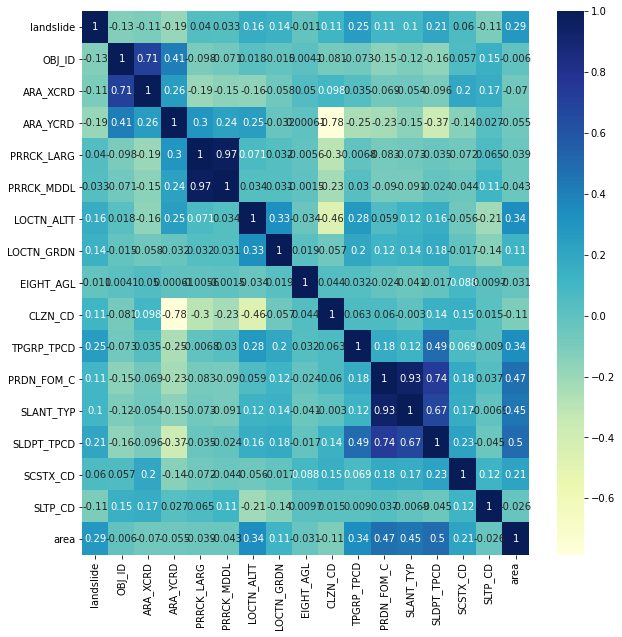

In [ ]:
# 토양도 상관계수(pearson)를 사용하여 히트맵 그리기
plt.figure(figsize = (10, 10))
corr_mat = sum_hg_all_3.corr(method='pearson')
sns.heatmap(corr_mat, xticklabels = corr_mat.columns, yticklabels = corr_mat.columns, annot=True, cmap='YlGnBu')

In [ ]:
# 토양도가 포함되지 않은 행정동 찾기
hangjung_gubun["check_umd"] = 0

for i in range (len(sum_hg_all)):
  for j in range (len(hangjung_gubun)):
    if sum_hg_all["umd2"][i] == hangjung_gubun["umd2"][j]:
      hangjung_gubun["check_umd"][j] += 1

hangjung_gubun

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,BASE_DATE,ADM_DR_CD,ADM_DR_NM,geometry,시,umd2,sum_cnt,landslide,check_umd
0,20200630,3701111,구룡포읍,"MULTIPOLYGON (((1184734.239 1774617.254, 11847...",포항시 남구,포항시 남구 구룡포읍,0,0,0
1,20200630,3701112,연일읍,"POLYGON ((1160923.832 1786524.018, 1160962.498...",포항시 남구,포항시 남구 연일읍,2,1,1
2,20200630,3701113,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383...",포항시 남구,포항시 남구 오천읍,0,0,1
3,20200630,3701131,대송면,"POLYGON ((1167538.928 1778439.770, 1167541.585...",포항시 남구,포항시 남구 대송면,1,1,1
4,20200630,3701132,동해면,"MULTIPOLYGON (((1181368.959 1784712.163, 11813...",포항시 남구,포항시 남구 동해면,0,0,1
...,...,...,...,...,...,...,...,...,...
632,20200630,3840042,쌍백면,"POLYGON ((1056287.745 1722189.578, 1056335.116...",합천군,합천군 쌍백면,3,1,1
633,20200630,3840043,삼가면,"POLYGON ((1052540.942 1719533.002, 1052573.371...",합천군,합천군 삼가면,1,1,1
634,20200630,3840044,가회면,"POLYGON ((1044199.527 1722837.244, 1044218.563...",합천군,합천군 가회면,5,1,1
635,20200630,3840045,대병면,"POLYGON ((1046756.129 1730112.827, 1046808.008...",합천군,합천군 대병면,2,1,1


In [ ]:
# 25개의 행정동에 토양도 데이터 없음을 확인
hangjung_gubun['check_umd'].value_counts()

1    612
0     25
Name: check_umd, dtype: int64

In [ ]:
# 토양도가 없는 행정동 이름 확인
no_soil = []
for i in range (len(hangjung_gubun)):
  if hangjung_gubun['check_umd'][i] == 0:
    no_soil.append(hangjung_gubun['umd2'][i])
no_soil

['포항시 남구 구룡포읍',
 '포항시 남구 장기면',
 '포항시 남구 호미곶면',
 '포항시 남구 청림동',
 '포항시 남구 제철동',
 '포항시 남구 상대동',
 '포항시 남구 해도동',
 '포항시 북구 죽도동',
 '경주시 감포읍',
 '경주시 중부동',
 '경주시 황오동',
 '구미시 원평2동',
 '구미시 공단2동',
 '경산시 하양읍',
 '경산시 와촌면',
 '경산시 중방동',
 '울릉군 울릉읍',
 '울릉군 서면',
 '울릉군 북면',
 '진주시 상평동',
 '진주시 신안동',
 '진주시 충무공동',
 '통영시 욕지면',
 '통영시 사량면',
 '양산시 양주동']

# **합친 데이터 파일 저장**

In [ ]:
# 행정동 기준으로 전처리된 토양도 합치기
merge_hg = pd.merge(sum_hg_all,hangjung_gubun,how='outer',on=['umd2', 'BASE_DATE', 'ADM_DR_CD', 'ADM_DR_NM', 'sgg', 'sum_cnt', 'landslide'])
merge_hg

,index_left,BASE_DATE,ADM_DR_CD,ADM_DR_NM,sgg,umd2,sum_cnt,landslide,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,LDMARK_STN,MAP_LABEL,geometry_x,area,geometry_y
0,276.0,20200630,3737035,개진면,고령군,고령군 개진면,0.0,0.0,221291,323585.15,248457.02,2,24,306.1,18.7,158.6,3,12,01,1,20,02,01,L101,b'B\xa9\xfb',"MULTIPOLYGON (((1077730.615 1747915.354, 10777...",573125.914456,"POLYGON ((1083423.047 1748839.489, 1083442.655..."
1,274.0,20200630,3737033,성산면,고령군,고령군 성산면,0.0,0.0,221315,324735.94,248511.41,2,26,103.2,13.4,244.5,3,12,01,1,10,02,01,L101,b'B\xa9\xfb',"POLYGON ((1079941.761 1748929.311, 1079941.734...",499155.259968,"POLYGON ((1077283.884 1755929.105, 1077321.814..."
2,277.0,20200630,3737036,우곡면,고령군,고령군 우곡면,1.0,1.0,221860,322059.85,240132,2,24,64.1,17.7,285.2,3,07,01,1,10,03,13,L313,b'DRb\xa9\xfb',"MULTIPOLYGON (((1077071.844 1739931.107, 10770...",477120.157525,"POLYGON ((1075001.726 1745931.140, 1075028.704..."
3,266.0,20200630,3736033,각북면,청도군,청도군 각북면,0.0,0.0,222469,341324,246272,1,12,573.4,22.5,15.5,3,12,01,1,10,02,01,L101,b'B\xa9\xfb',"POLYGON ((1096076.711 1746735.789, 1096082.000...",434384.134642,"POLYGON ((1100726.770 1749523.268, 1100739.559..."
4,267.0,20200630,3736034,이서면,청도군,청도군 이서면,0.0,0.0,222863,353153,248292,2,26,249.5,15.1,86.6,3,12,01,1,10,02,01,L101,b'B\xa9\xfb',"POLYGON ((1108027.010 1747855.448, 1108032.166...",498817.582789,"POLYGON ((1108258.343 1750339.884, 1108335.531..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,NaN,20200630,3803068,신안동,진주시,진주시 신안동,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,"POLYGON ((1052000.324 1688426.883, 1052007.400..."
633,NaN,20200630,3803076,충무공동,진주시,진주시 충무공동,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,"POLYGON ((1057890.162 1687975.644, 1057941.907..."
634,NaN,20200630,3805034,욕지면,통영시,통영시 욕지면,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,"MULTIPOLYGON (((1089649.319 1611963.498, 10896..."
635,NaN,20200630,3805036,사량면,통영시,통영시 사량면,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,"MULTIPOLYGON (((1066502.144 1641102.303, 10665..."


In [ ]:
# 데이터 변수명 변경
merge_hg.rename(columns={'ADM_DR_NM':'umd'}, inplace=True)
# 객관적으로 불필요한 변수 제거
drop_hg_all = merge_hg.drop(["geometry_x", 'geometry_y', "index_left", "area"], axis=1)
# 주관적으로 불필요한 변수 제거
sum_hg_all_csv = drop_hg_all.drop(["BASE_DATE", 'LDMARK_STN', "OBJ_ID", "ARA_XCRD", "ARA_YCRD", "MAP_LABEL", "ADM_DR_CD", "sum_cnt", "landslide"], axis=1)
# 결측치(토양도 없는 행정동의 토양도 데이터)에 0값 배치
sum_hg_all_csv = sum_hg_all_csv.fillna(0)
# csv 파일로 저장
sum_hg_all_csv.to_csv("y_sum_hg_all.csv")